EMILIO FRAUSTO ORTIZ

In [1]:
def get_texts_from_file(path_data, path_labels):
    tr_txt = []  #aqui van los tuits 
    tr_y   = []  #aqui van las etiquetas

    with open(path_data, "r", encoding = "utf-8") as f_data:
        for twitt in f_data:
            tr_txt += [twitt]

    with open(path_labels, "r", encoding = "utf-8") as f_labels:

        
        for label in f_labels:
            tr_y   += [label]

    return tr_txt , tr_y

tr_txt, tr_y = get_texts_from_file("mex20_train.txt","mex20_train_labels.txt")

print(len(tr_txt))

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

import nltk

word_world = []

for twuit in tr_txt:
    word_world += tokenizer.tokenize(twuit)

f_dic = nltk.FreqDist(word_world)

def sortFreqDist(freqdist):
    aux = [(freqdist[key], key) for key in freqdist]
    aux.sort()
    aux.reverse()
    return aux

V = sortFreqDist(f_dic)

5278


In [2]:
#Asegurar un orden en el diccionario
dict_indices = dict()

cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

In [3]:
##En vez de que sea binaria, haz la que registre la frecuencia

import numpy as np

def build_bowl_tr(tr_txt, vocabulary, dict_indices):
    # El objetivo es construir la matriz BOW
    bowl = np.zeros((len(tr_txt), len(vocabulary)), dtype=int) #Matriz de BOWL

    # RELLENAR LA MATRIZ BOWL, cada renglon es un tuit y cada columna una palabra
    #Si la palabra aparece en el tuit, poner un uno
    count_doc = 0
    for tuit in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tuit.lower())) #Tuit tokenizado
        for word in fdist_doc:
            if word in dict_indices:
                bowl[count_doc, dict_indices[word]] = fdist_doc[word] 
        count_doc += 1
    
    return bowl

In [4]:
bowl = build_bowl_tr(tr_txt, word_world, dict_indices)
print(bowl.shape)

(5278, 97473)


In [5]:
bowl

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [6]:
# COMPUTE
def compute_dor_mi_intento(bolsa):
    dim = bolsa.shape
    dor = np.zeros((dim[1],dim[0]), dtype=float)
    
    
    for palabra in range(dim[1]):
        for tuit in range(dim[0]):
            dor[palabra,tuit] = bolsa[tuit,palabra] * (np.abs(dim[0])/len(bolsa[tuit,:]))
    return dor
        
        
        

In [7]:
#TARDA MUCHO

#dor = compute_dor(bowl)
#print(dor.shape)

In [8]:
#dor

In [9]:
def compute_dor(bolsa):
    dim = bolsa.shape
    dor = np.zeros((dim[1],dim[0]), dtype=float)

    tam_v = dim[1] 
    
    for doc, i in zip(bolsa, range(len(bolsa))):
        non_zero_positions = np.nonzero(doc)[0] #las dimensiones de las palabras contenidas en el tuit
        tam_v_tuit = len(non_zero_positions)
        for term in non_zero_positions:
            dor[term,i] = np.log(1 + doc[term]) * np.log(tam_v/tam_v_tuit)
    
    return dor
        

In [10]:
dor = compute_dor(bowl)
print(dor.shape)

(97473, 5278)


In [11]:
dor

array([[0.        , 0.        , 0.        , ..., 0.        , 9.57412262,
        6.08533352],
       [9.22426544, 0.        , 6.36638052, ..., 6.36638052, 0.        ,
        6.08533352],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## NORMALIZACION

In [13]:
from sklearn import preprocessing

dor_normalizado = preprocessing.normalize(dor, norm='l2')
print(dor_normalizado.shape)

(97473, 5278)


In [14]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selector = SelectKBest(chi2, k=1000)

#selecciona palabras importantes
feature_selector.fit(bowl, tr_y)

SelectKBest(k=1000, score_func=<function chi2 at 0x0000021E853959E0>)

In [16]:
best = feature_selector.get_support(indices=True)

In [17]:
best

array([    0,     1,     2,     4,     5,     6,     7,    10,    11,
          12,    13,    17,    18,    19,    22,    24,    25,    28,
          30,    32,    36,    37,    38,    39,    41,    43,    44,
          48,    50,    53,    54,    56,    57,    58,    59,    61,
          63,    64,    65,    66,    67,    69,    70,    71,    78,
          79,    86,    88,    89,    92,    93,    94,    97,   100,
         102,   103,   104,   105,   107,   111,   114,   115,   116,
         117,   119,   120,   122,   123,   124,   128,   129,   131,
         133,   134,   136,   143,   147,   148,   150,   151,   153,
         154,   163,   166,   170,   177,   178,   179,   182,   183,
         184,   187,   188,   191,   198,   200,   209,   211,   217,
         221,   222,   225,   230,   231,   233,   236,   237,   240,
         243,   245,   246,   248,   249,   250,   252,   253,   257,
         260,   264,   265,   266,   271,   273,   279,   281,   284,
         285,   289,

In [20]:
dict_indices_invertido = {valor: key for key, valor in dict_indices.items()}
dict_indices_invertido                     

{0: ',',
 1: 'de',
 2: 'que',
 3: '.',
 4: 'la',
 5: 'a',
 6: 'y',
 7: '!',
 8: 'no',
 9: '@USUARIO',
 10: 'me',
 11: 'el',
 12: 'en',
 13: 'se',
 14: 'es',
 15: 'con',
 16: '?',
 17: 'verga',
 18: 'los',
 19: 'madre',
 20: 'por',
 21: 'las',
 22: '"',
 23: 'un',
 24: 'te',
 25: 'mi',
 26: 'lo',
 27: 'putas',
 28: 'una',
 29: '...',
 30: 'putos',
 31: 'para',
 32: '😂',
 33: 'si',
 34: 'ya',
 35: 'como',
 36: 'su',
 37: 'pero',
 38: 'tu',
 39: 'loca',
 40: 'le',
 41: 'más',
 42: 'No',
 43: 'del',
 44: 'gorda',
 45: 'al',
 46: 'bien',
 47: 'A',
 48: '¿',
 49: 'Y',
 50: 'son',
 51: 'Me',
 52: 'o',
 53: 'feas',
 54: 'cuando',
 55: 'Que',
 56: ':',
 57: 'yo',
 58: 'les',
 59: 'porque',
 60: 'ni',
 61: 'está',
 62: 'ser',
 63: 'estoy',
 64: 'sus',
 65: 'todos',
 66: 'esta',
 67: 'puta',
 68: 'Ya',
 69: 'todo',
 70: 'pinche',
 71: 'puto',
 72: 'tan',
 73: 'Si',
 74: 'La',
 75: 'qué',
 76: '…',
 77: 'eso',
 78: 'muy',
 79: 'soy',
 80: 'hasta',
 81: 'así',
 82: '¡',
 83: '<URL>',
 84: 'mamar',


In [21]:
t_words = [dict_indices_invertido[index] for index in best]

In [22]:
target_matrix = np.array([dor_normalizado[dict_indices[word]] for word in t_words])

In [23]:
target_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02727259,
        0.01733452],
       [0.0260742 , 0.        , 0.01799582, ..., 0.01799582, 0.        ,
        0.01720139],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
target_matrix.shape

(1000, 5278)

In [25]:
dor_normalizado.shape

(97473, 5278)

## REDUCCION DE DIMENSIONALIDAD

In [26]:
from sklearn.manifold import TSNE

matriz_reducida = TSNE(n_components = 2).fit_transform(target_matrix)

In [27]:
matriz_reducida

array([[ -3.8302903,   3.6508672],
       [ -3.0716426,   3.9151454],
       [ -3.8551905,   2.565537 ],
       ...,
       [-48.20749  , -33.80899  ],
       [ 23.862673 , -27.237267 ],
       [ 35.962322 , -24.169653 ]], dtype=float32)

In [28]:
max_x , max_y = np.max(matriz_reducida, axis=0)
min_x , min_y = np.min(matriz_reducida, axis=0)

print(f"max_x: {max_x}, max_y: {max_y}")
print(f"min_x: {min_x}, min_y: {min_y}")

max_x: 56.81631851196289, max_y: 52.49380874633789
min_x: -56.926395416259766, min_y: -57.48106002807617


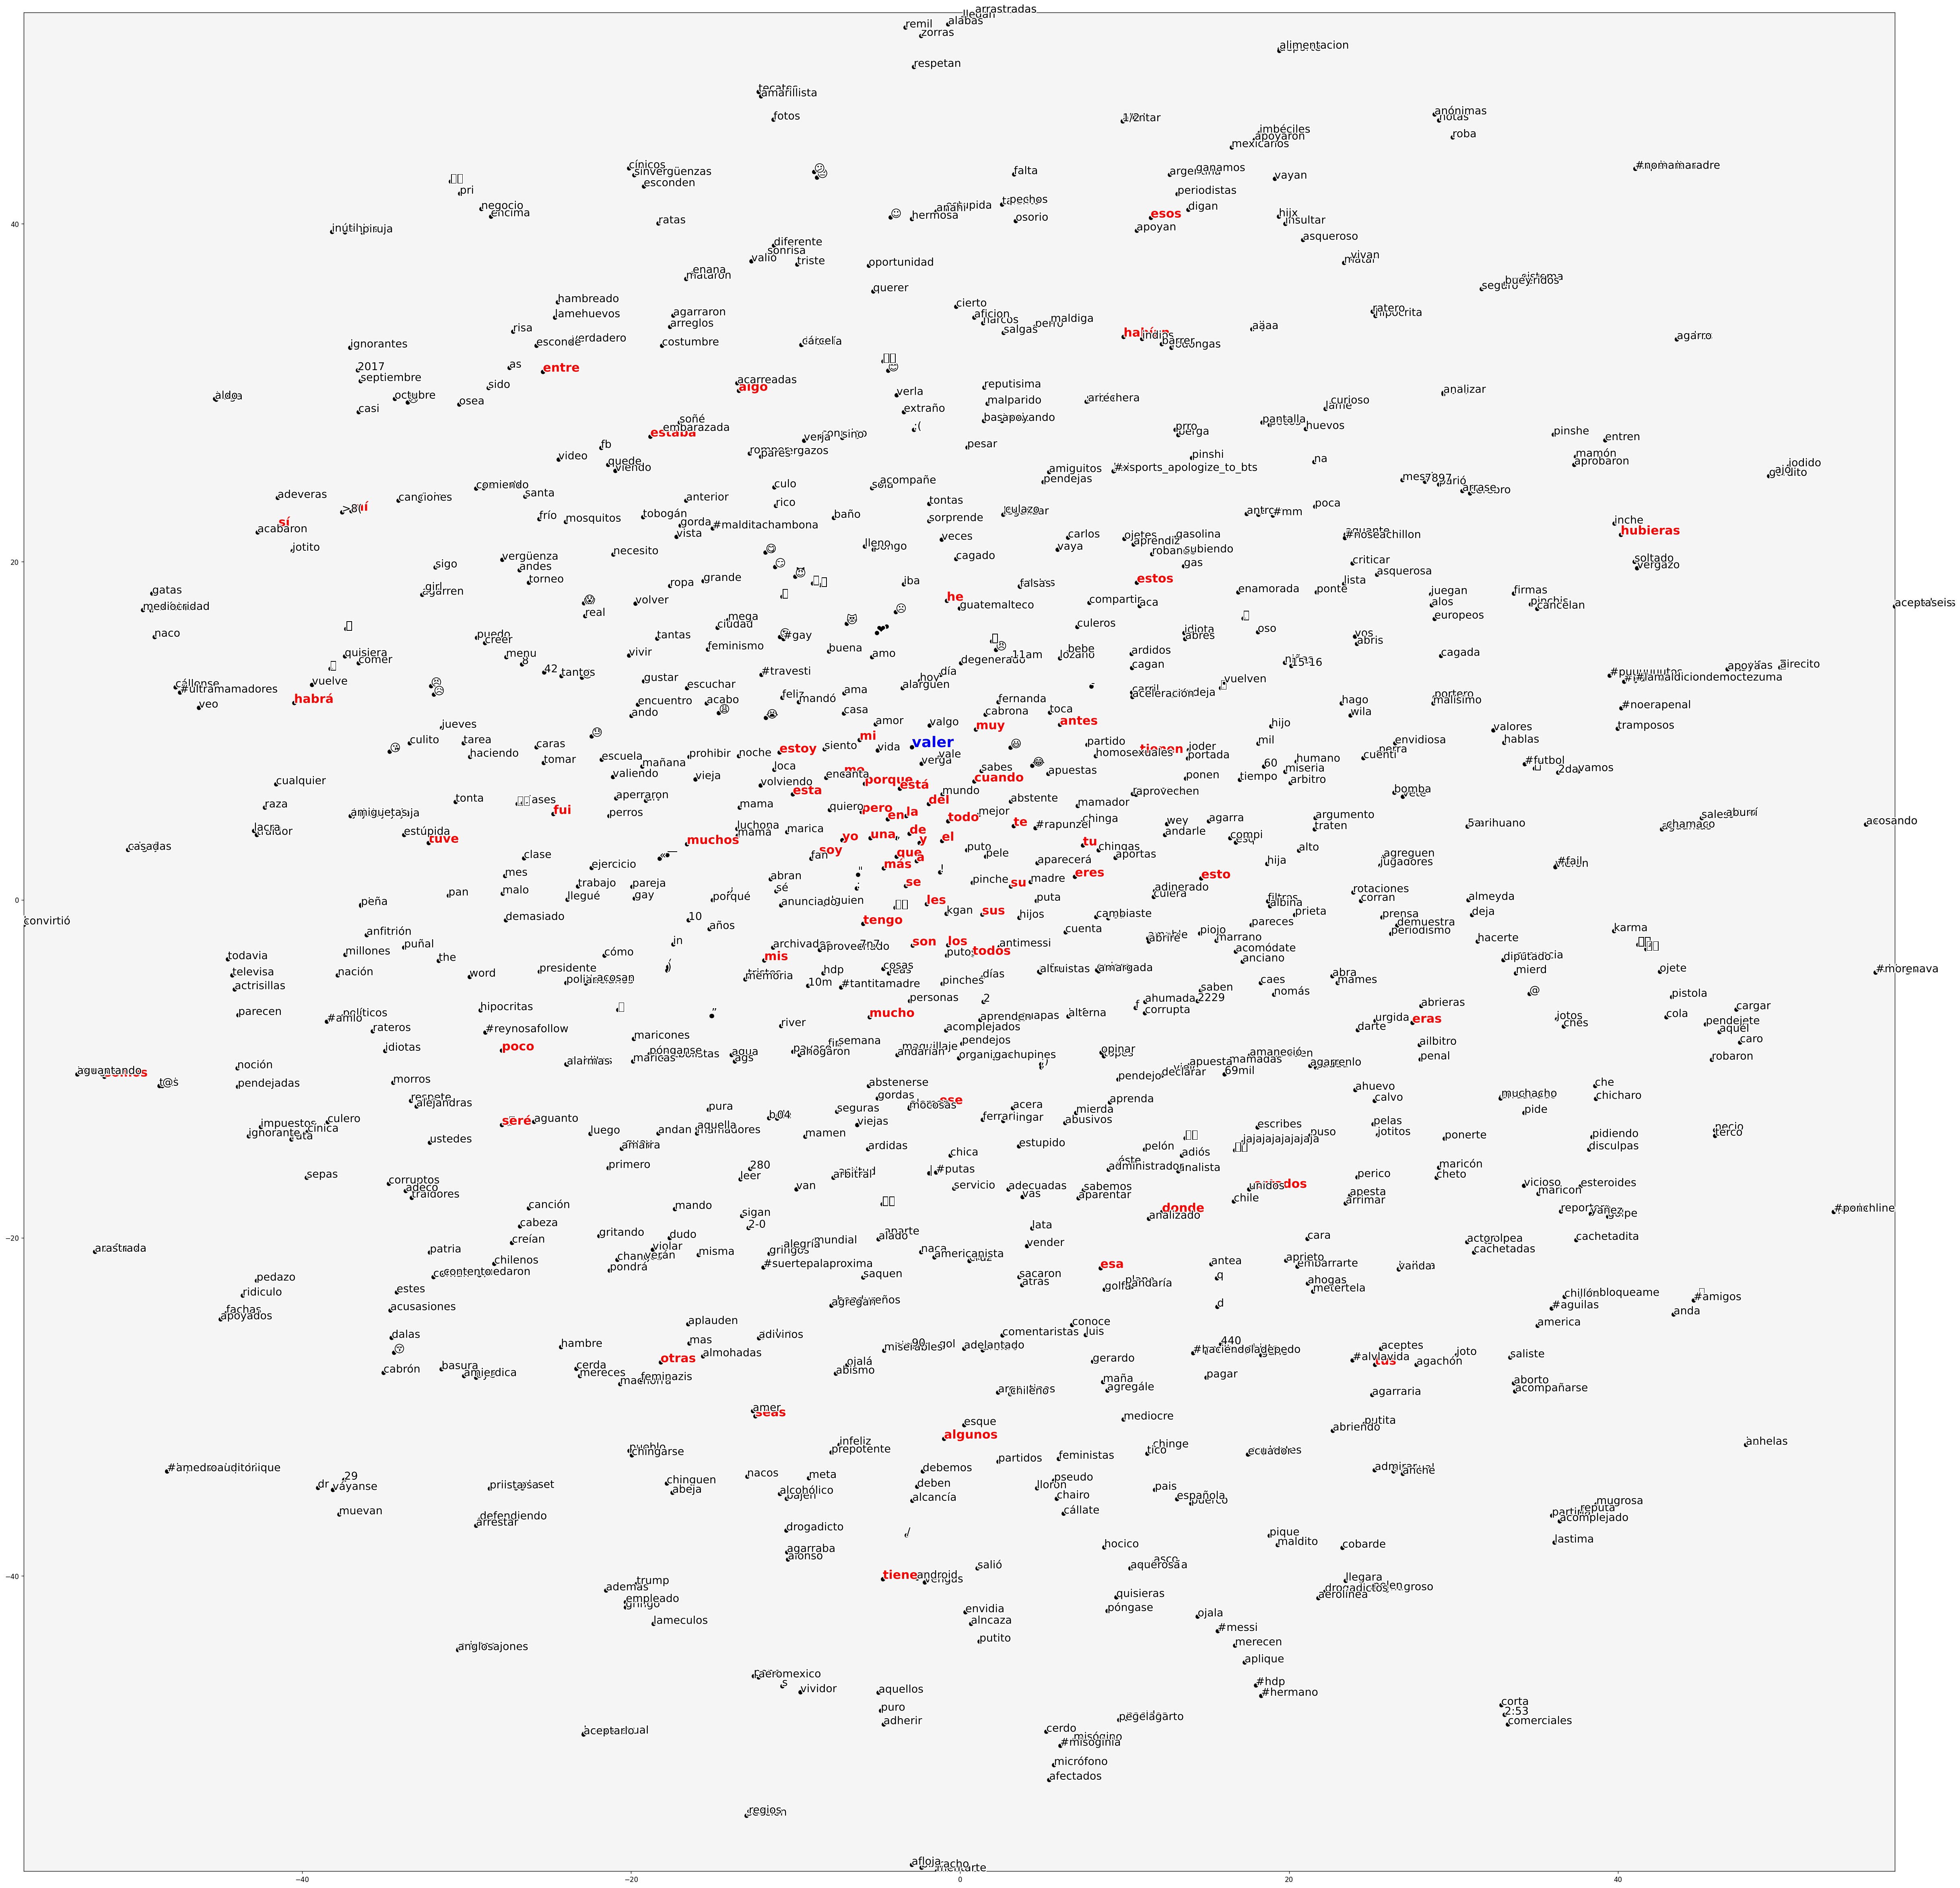

In [37]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
from nltk.corpus import stopwords

x, y = matriz_reducida[:, 0], matriz_reducida[:, 1]

plt.figure(figsize=(50, 50), dpi=120)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.scatter(x, y, s=30, color='black')






sw = stopwords.words('spanish')


for i, word in enumerate(t_words):
    if word in sw:
        plt.annotate(
            word, 
            (x[i], y[i]), 
            fontsize=18, 
            color='red', 
            fontweight='bold',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )
    elif word in ['valer']:
        plt.annotate(
            word, 
            (x[i], y[i]), 
            fontsize=22, 
            color='blue', 
            fontweight='bold',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )
    else:
        plt.annotate(
            word, 
            (x[i], y[i]), 
            fontsize=16, 
            color='black',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )

plt.gca().set_facecolor('whitesmoke')
plt.show()